# PROJECT-24

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# IMPORTING DATSET

In [3]:
data=pd.read_csv("NEW.csv")
data.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [4]:
data.dtypes

LotArea             int64
OverallQual         int64
OverallCond         int64
TotalBsmtSF         int64
FullBath            int64
HalfBath            int64
BedroomAbvGr        int64
TotRmsAbvGrd        int64
Fireplaces          int64
GarageArea          int64
AboveMedianPrice    int64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
LotArea             1460 non-null int64
OverallQual         1460 non-null int64
OverallCond         1460 non-null int64
TotalBsmtSF         1460 non-null int64
FullBath            1460 non-null int64
HalfBath            1460 non-null int64
BedroomAbvGr        1460 non-null int64
TotRmsAbvGrd        1460 non-null int64
Fireplaces          1460 non-null int64
GarageArea          1460 non-null int64
AboveMedianPrice    1460 non-null int64
dtypes: int64(11)
memory usage: 125.5 KB


In [6]:
data.describe()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,1057.429452,1.565068,0.382877,2.866438,6.517808,0.613014,472.980137,0.498630
std,9981.264932,1.382997,1.112799,438.705324,0.550916,0.502885,0.815778,1.625393,0.644666,213.804841,0.500169
min,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,7553.500000,5.000000,5.000000,795.750000,1.000000,0.000000,2.000000,5.000000,0.000000,334.500000,0.000000
50%,9478.500000,6.000000,5.000000,991.500000,2.000000,0.000000,3.000000,6.000000,1.000000,480.000000,0.000000
75%,11601.500000,7.000000,6.000000,1298.250000,2.000000,1.000000,3.000000,7.000000,1.000000,576.000000,1.000000
max,215245.000000,10.000000,9.000000,6110.000000,3.000000,2.000000,8.000000,14.000000,3.000000,1418.000000,1.000000


In [7]:
data.corr()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
LotArea,1.000000,0.105806,-0.005636,0.260833,0.126031,0.014259,0.119690,0.190015,0.271364,0.180403,0.189180
OverallQual,0.105806,1.000000,-0.091932,0.537808,0.550600,0.273458,0.101676,0.427452,0.396765,0.562022,0.672486
OverallCond,-0.005636,-0.091932,1.000000,-0.171098,-0.194149,-0.060769,0.012980,-0.057583,-0.023820,-0.151521,-0.141429
TotalBsmtSF,0.260833,0.537808,-0.171098,1.000000,0.323722,-0.048804,0.050450,0.285573,0.339519,0.486665,0.438301
FullBath,0.126031,0.550600,-0.194149,0.323722,1.000000,0.136381,0.363252,0.554784,0.243671,0.405656,0.615951
HalfBath,0.014259,0.273458,-0.060769,-0.048804,0.136381,1.000000,0.226651,0.343415,0.203649,0.163549,0.308644
BedroomAbvGr,0.119690,0.101676,0.012980,0.050450,0.363252,0.226651,1.000000,0.676620,0.107570,0.065253,0.144853
TotRmsAbvGrd,0.190015,0.427452,-0.057583,0.285573,0.554784,0.343415,0.676620,1.000000,0.326114,0.337822,0.417355
Fireplaces,0.271364,0.396765,-0.023820,0.339519,0.243671,0.203649,0.107570,0.326114,1.000000,0.269141,0.420297
GarageArea,0.180403,0.562022,-0.151521,0.486665,0.405656,0.163549,0.065253,0.337822,0.269141,1.000000,0.505068


In [8]:
data.skew()

LotArea             12.207688
OverallQual          0.216944
OverallCond          0.693067
TotalBsmtSF          1.524255
FullBath             0.036562
HalfBath             0.675897
BedroomAbvGr         0.211790
TotRmsAbvGrd         0.676341
Fireplaces           0.649565
GarageArea           0.179981
AboveMedianPrice     0.005485
dtype: float64

# CHECKING OUTLIERS

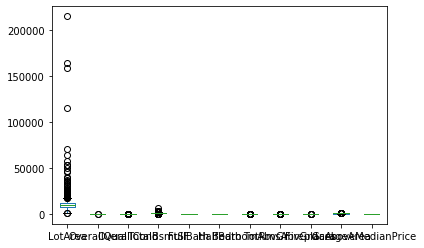

In [9]:
data.plot.box()

# REMOVING OUTLIERS

In [10]:
from scipy.stats import zscore

In [11]:
z=np.abs(zscore(data))
z

array([[0.20714171, 0.65147924, 0.51719981, ..., 0.95122649, 0.35100032,
        1.00274349],
       [0.09188637, 0.07183611, 2.17962776, ..., 0.60049493, 0.06073101,
        1.00274349],
       [0.07347998, 0.65147924, 0.51719981, ..., 0.60049493, 0.63172623,
        1.00274349],
       ...,
       [0.14781027, 0.65147924, 3.07857028, ..., 2.15221636, 1.03391416,
        1.00274349],
       [0.08016039, 0.79515147, 0.38174271, ..., 0.95122649, 1.09005935,
        0.99726402],
       [0.05811155, 0.79515147, 0.38174271, ..., 0.95122649, 0.9216238 ,
        0.99726402]])

In [12]:
tthresholds=4
print(np.where(z>4))

(array([ 249,  313,  332,  335,  375,  384,  440,  451,  457,  496,  523,
        581,  635,  635,  706,  769, 1190, 1298, 1298, 1298, 1396],
      dtype=int64), array([0, 0, 3, 0, 2, 0, 3, 0, 0, 3, 3, 9, 6, 7, 0, 0, 9, 0, 3, 9, 0],
      dtype=int64))


In [16]:
data_new=data[(z<4).all(axis=1)]
data_new.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


# MISSING VALUES

In [17]:
data_new.isnull()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [18]:
data.isnull().sum()

LotArea             0
OverallQual         0
OverallCond         0
TotalBsmtSF         0
FullBath            0
HalfBath            0
BedroomAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageArea          0
AboveMedianPrice    0
dtype: int64

# VISUALIZATION

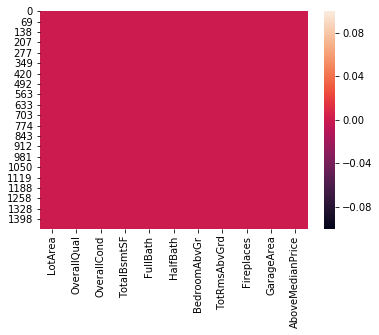

In [19]:
sns.heatmap(data_new.isnull())

In [20]:
data_new.corr()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
LotArea,1.000000,0.191072,-0.000895,0.306888,0.172244,0.090777,0.244738,0.327696,0.296500,0.296565,0.298974
OverallQual,0.191072,1.000000,-0.100390,0.538465,0.542574,0.277515,0.098507,0.419726,0.397274,0.563821,0.681577
OverallCond,-0.000895,-0.100390,1.000000,-0.178092,-0.204288,-0.056850,0.000482,-0.062299,-0.021684,-0.150545,-0.144835
TotalBsmtSF,0.306888,0.538465,-0.178092,1.000000,0.317158,-0.059606,0.045867,0.253046,0.317805,0.477810,0.466432
FullBath,0.172244,0.542574,-0.204288,0.317158,1.000000,0.138037,0.361682,0.550788,0.239719,0.407884,0.616390
HalfBath,0.090777,0.277515,-0.056850,-0.059606,0.138037,1.000000,0.235591,0.349766,0.213011,0.164256,0.315889
BedroomAbvGr,0.244738,0.098507,0.000482,0.045867,0.361682,0.235591,1.000000,0.676528,0.116121,0.073190,0.142019
TotRmsAbvGrd,0.327696,0.419726,-0.062299,0.253046,0.550788,0.349766,0.676528,1.000000,0.324861,0.336628,0.419450
Fireplaces,0.296500,0.397274,-0.021684,0.317805,0.239719,0.213011,0.116121,0.324861,1.000000,0.255816,0.421149
GarageArea,0.296565,0.563821,-0.150545,0.477810,0.407884,0.164256,0.073190,0.336628,0.255816,1.000000,0.513487


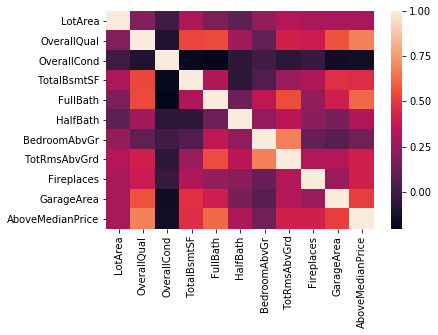

In [21]:
sns.heatmap(data_new.corr())

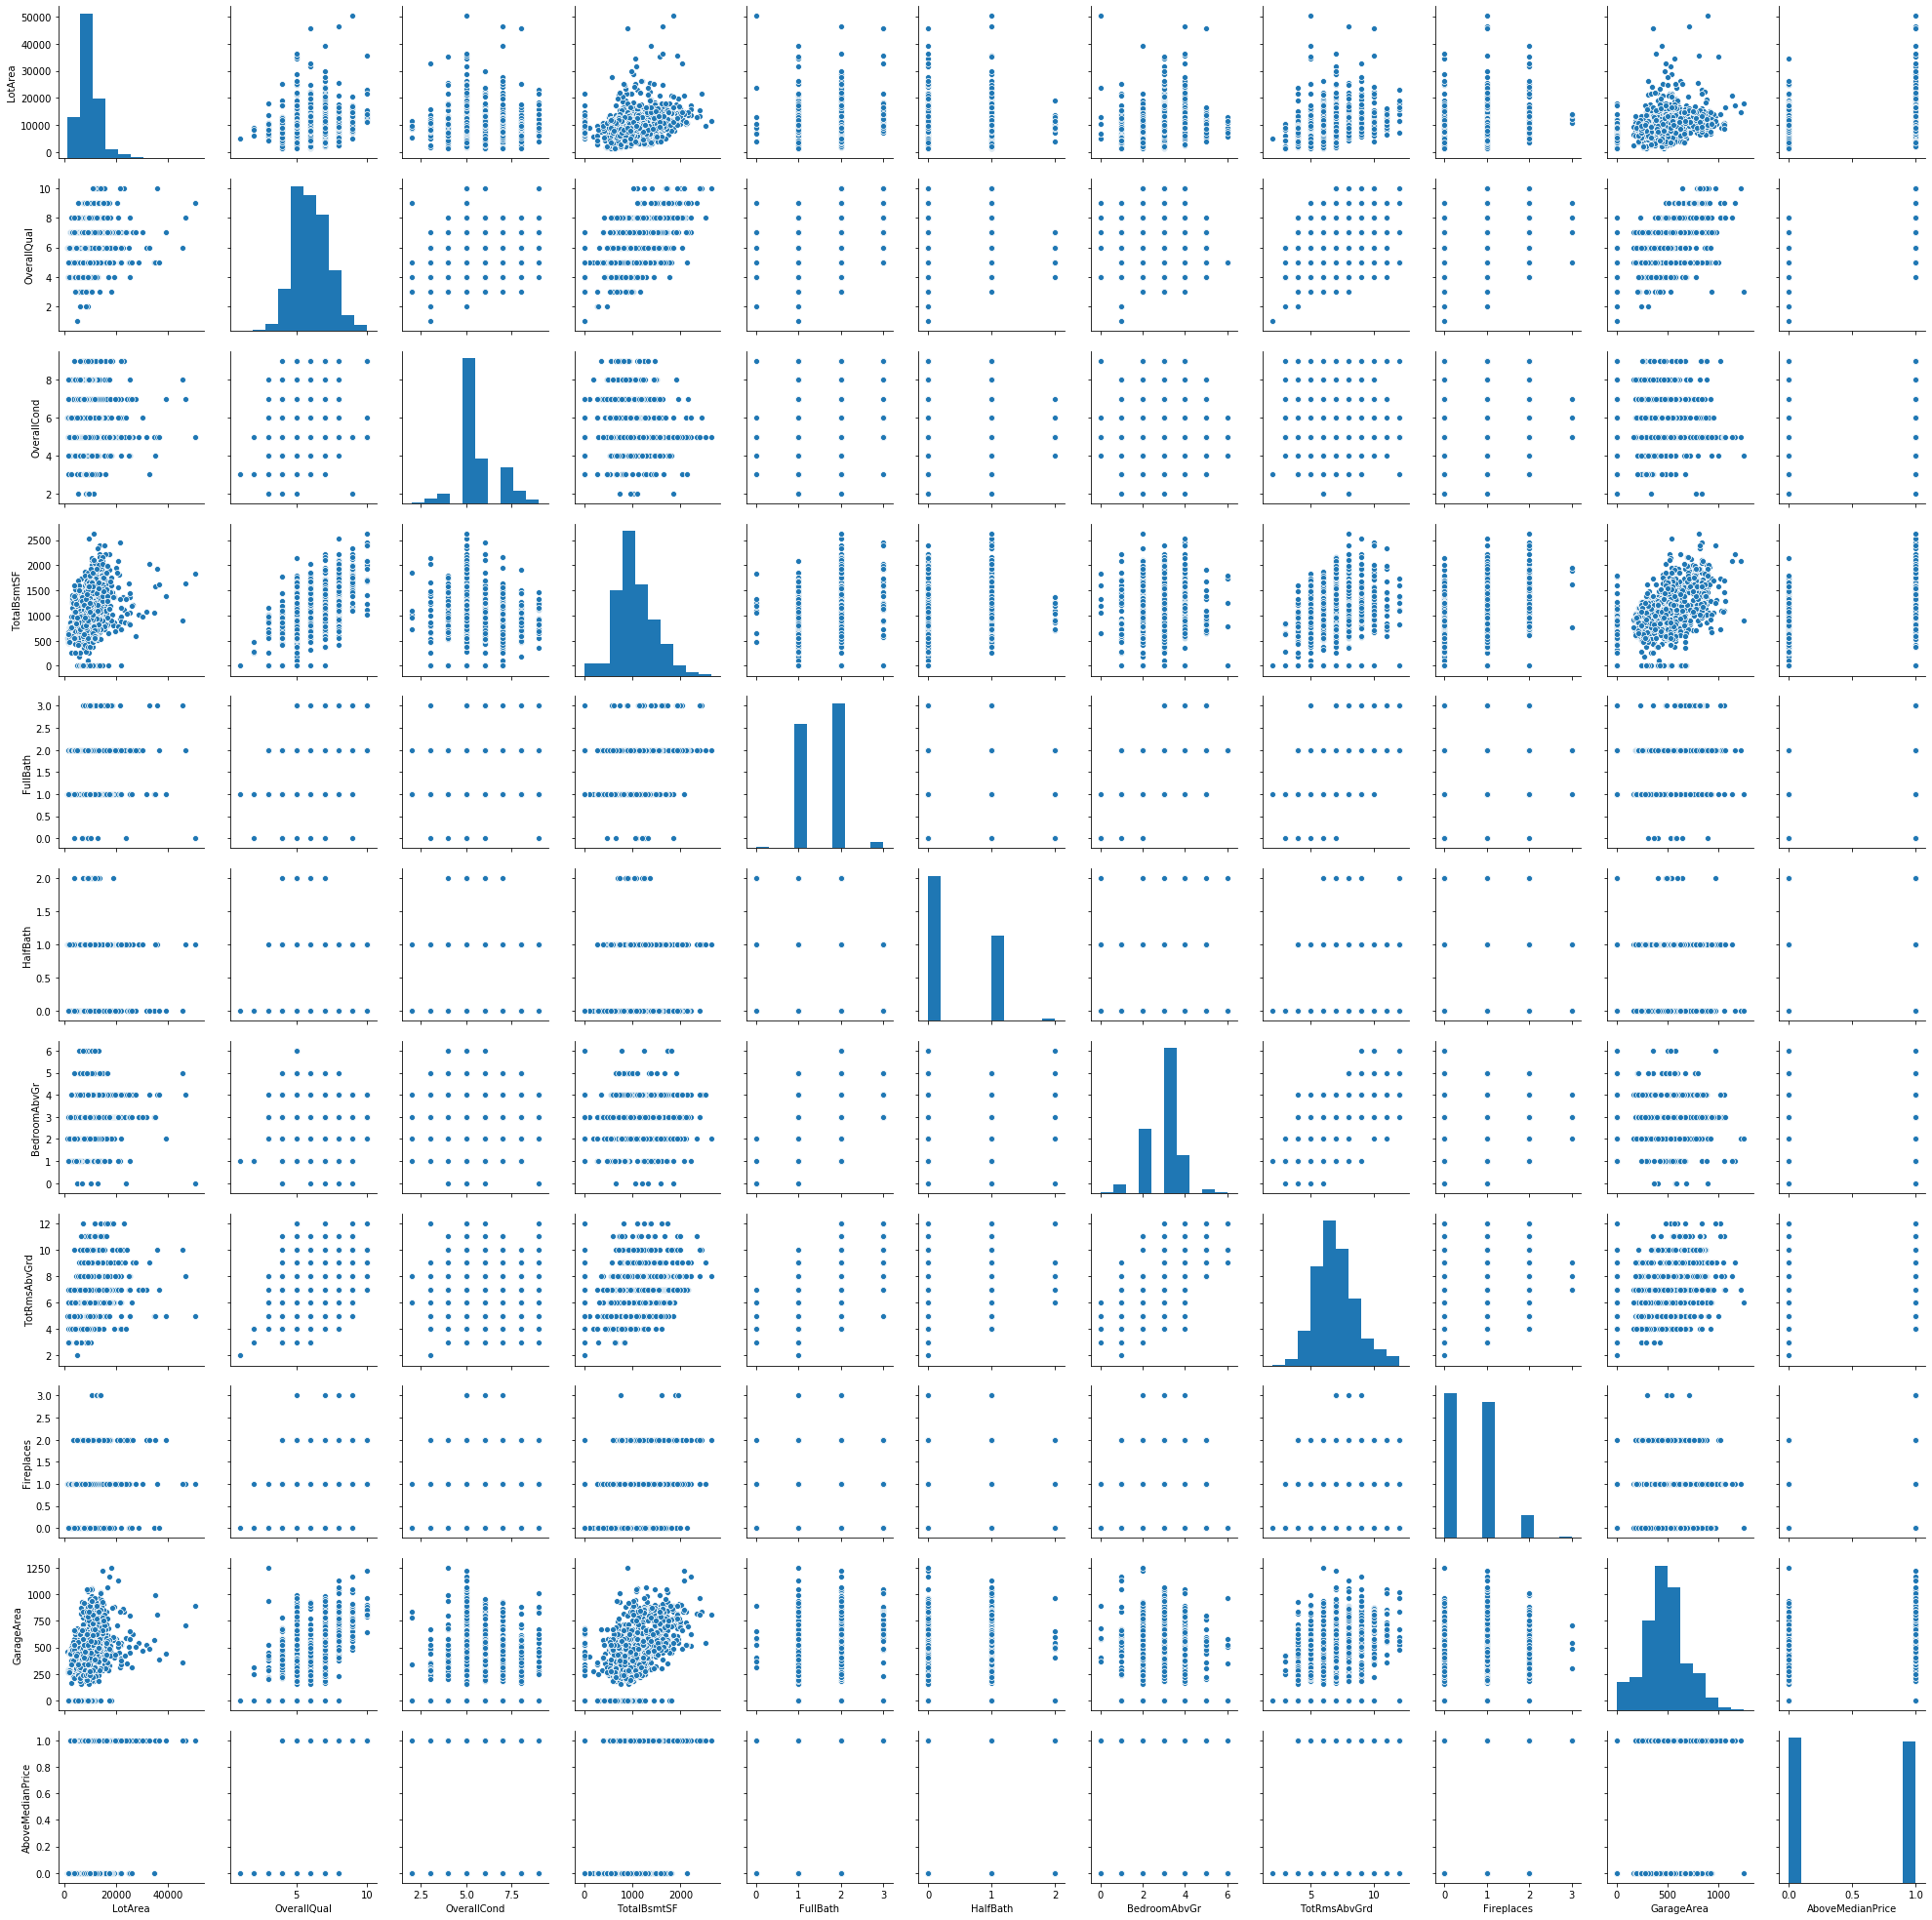

In [22]:
sns.pairplot(data_new)

In [23]:
data_new.skew()

LotArea             2.440795
OverallQual         0.228596
OverallCond         0.738686
TotalBsmtSF         0.292414
FullBath            0.037120
HalfBath            0.675217
BedroomAbvGr        0.060598
TotRmsAbvGrd        0.607073
Fireplaces          0.638064
GarageArea          0.057402
AboveMedianPrice    0.022216
dtype: float64

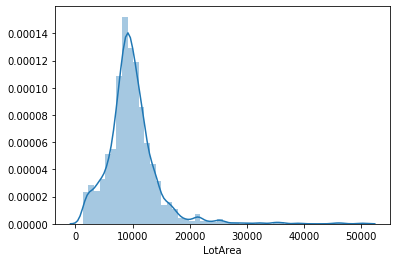

In [26]:
sns.distplot(data_new["LotArea"])

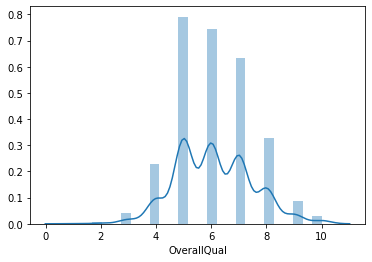

In [27]:
sns.distplot(data_new["OverallQual"])

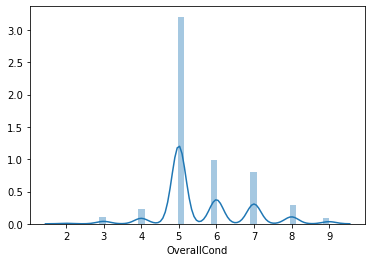

In [28]:
sns.distplot(data_new["OverallCond"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000130A37B8>,
      dtype=object)

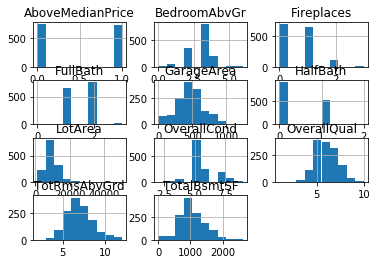

In [29]:
data_new.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001310EF98>,
      dtype=object)

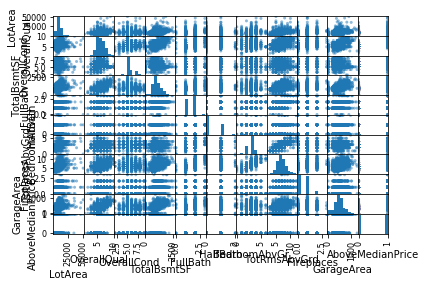

In [31]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_new)

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_new=scaler.fit_transform(data_new.astype(float))
data_new

array([[0.14600478, 0.66666667, 0.42857143, ..., 0.        , 0.43910256,
        1.        ],
       [0.16948806, 0.55555556, 0.85714286, ..., 0.33333333, 0.36858974,
        1.        ],
       [0.20318147, 0.66666667, 0.42857143, ..., 0.33333333, 0.48717949,
        1.        ],
       ...,
       [0.15809357, 0.66666667, 1.        , ..., 0.66666667, 0.20192308,
        1.        ],
       [0.17187723, 0.44444444, 0.57142857, ..., 0.        , 0.19230769,
        0.        ],
       [0.17636969, 0.44444444, 0.57142857, ..., 0.        , 0.22115385,
        0.        ]])

In [34]:
df=pd.DataFrame(data_new)
df

,0,1,2,3,4,5,6,7,8,9,10
0,0.146005,0.666667,0.428571,0.325104,0.666667,0.5,0.500000,0.6,0.000000,0.439103,1.0
1,0.169488,0.555556,0.857143,0.479301,0.666667,0.0,0.500000,0.4,0.333333,0.368590,1.0
2,0.203181,0.666667,0.428571,0.349411,0.666667,0.5,0.500000,0.4,0.333333,0.487179,1.0
3,0.168467,0.666667,0.428571,0.287125,0.333333,0.0,0.500000,0.5,0.333333,0.514423,0.0
4,0.264646,0.777778,0.428571,0.434865,0.666667,0.5,0.666667,0.7,0.333333,0.669872,1.0
5,0.261685,0.444444,0.428571,0.302317,0.333333,0.5,0.166667,0.3,0.000000,0.384615,0.0
6,0.179371,0.777778,0.428571,0.640334,0.666667,0.0,0.500000,0.5,0.333333,0.509615,1.0
7,0.185457,0.666667,0.571429,0.420433,0.666667,0.5,0.500000,0.5,0.666667,0.387821,1.0
8,0.098426,0.666667,0.428571,0.361565,0.666667,0.0,0.333333,0.6,0.666667,0.375000,0.0
9,0.124972,0.444444,0.571429,0.376377,0.333333,0.0,0.333333,0.3,0.666667,0.164263,0.0


In [35]:
x=df.drop(10,axis=1)
x.head()

,0,1,2,3,4,5,6,7,8,9
0,0.146005,0.666667,0.428571,0.325104,0.666667,0.5,0.500000,0.6,0.000000,0.439103
1,0.169488,0.555556,0.857143,0.479301,0.666667,0.0,0.500000,0.4,0.333333,0.368590
2,0.203181,0.666667,0.428571,0.349411,0.666667,0.5,0.500000,0.4,0.333333,0.487179
3,0.168467,0.666667,0.428571,0.287125,0.333333,0.0,0.500000,0.5,0.333333,0.514423
4,0.264646,0.777778,0.428571,0.434865,0.666667,0.5,0.666667,0.7,0.333333,0.669872


In [36]:
y=df[10]
y

0       1.0
1       1.0
2       1.0
3       0.0
4       1.0
5       0.0
6       1.0
7       1.0
8       0.0
9       0.0
10      0.0
11      1.0
12      0.0
13      1.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      1.0
21      0.0
22      1.0
23      0.0
24      0.0
25      1.0
26      0.0
27      1.0
28      1.0
29      0.0
       ... 
1412    1.0
1413    0.0
1414    0.0
1415    1.0
1416    0.0
1417    1.0
1418    0.0
1419    1.0
1420    0.0
1421    1.0
1422    1.0
1423    0.0
1424    1.0
1425    0.0
1426    1.0
1427    0.0
1428    0.0
1429    1.0
1430    0.0
1431    0.0
1432    0.0
1433    1.0
1434    0.0
1435    0.0
1436    1.0
1437    1.0
1438    1.0
1439    1.0
1440    0.0
1441    0.0
Name: 10, Length: 1442, dtype: float64

# TRAINING AND TESTING PHASE

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=22)

In [81]:
x_train.shape

(1081, 10)

In [82]:
x_test.shape

(361, 10)

In [83]:
y_train.shape

(1081,)

In [84]:
y_test.shape

(361,)

In [85]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(x)

# APPLYING MODELS

In [86]:
lg=LogisticRegression()

In [87]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
predlg=lg.predict(x_test)

In [89]:
print(accuracy_score(y_test,predlg))

0.9113573407202216


In [90]:
print(classification_report(y_test,predlg))

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91       181
         1.0       0.91      0.91      0.91       180

    accuracy                           0.91       361
   macro avg       0.91      0.91      0.91       361
weighted avg       0.91      0.91      0.91       361



In [91]:
print(confusion_matrix(y_test,predlg))

[[165  16]
 [ 16 164]]


In [96]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=400, random_state=0)

In [97]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(estimator=rfc, X=x_train, y=y_train, cv=5))

[0.93548387 0.88479263 0.89400922 0.8744186  0.88837209]


# GRIDSEARCHCV

In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
grid_param={
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [120]:
gsv= GridSearchCV(estimator=rfc,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [121]:
gsv.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=400, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootst

In [122]:
best_parameters=gsv.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'gini', 'n_estimators': 100}


In [123]:
best_score=gsv.best_score_
print(best_score)

0.8991674375578168


# DECISION TREE CLASSIFIER AND KNEIGHBORS CLASSIFIER

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [106]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8698060941828255
[[160  21]
 [ 26 154]]
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87       181
         1.0       0.88      0.86      0.87       180

    accuracy                           0.87       361
   macro avg       0.87      0.87      0.87       361
weighted avg       0.87      0.87      0.87       361



In [107]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.889196675900277
[[161  20]
 [ 20 160]]
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89       181
         1.0       0.89      0.89      0.89       180

    accuracy                           0.89       361
   macro avg       0.89      0.89      0.89       361
weighted avg       0.89      0.89      0.89       361



In [124]:
#save the model
from sklearn.externals import joblib
joblib.dump(rfc,"House.pkl")

['House.pkl']